In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [8]:

# Load the data (assuming you have the Excel file, replace 'your_file.xlsx' with your actual filename)
data = pd.read_excel('data/temperature25.xlsx')

In [9]:
# Sort the data based on the 'Current_A' column
sorted_data = data.sort_values(by='Current_A')
sorted_data = sorted_data[sorted_data['DeltaT_C'] == 10]

# Extract x and y values after sorting (replace with appropriate column names)
x_filtered = sorted_data['Current_A']  # Replace 'Current_A' with the actual name of the x column
y_filtered = sorted_data['COP']  # Replace 'Your_Y_Column' with the actual name of the y column

1.0


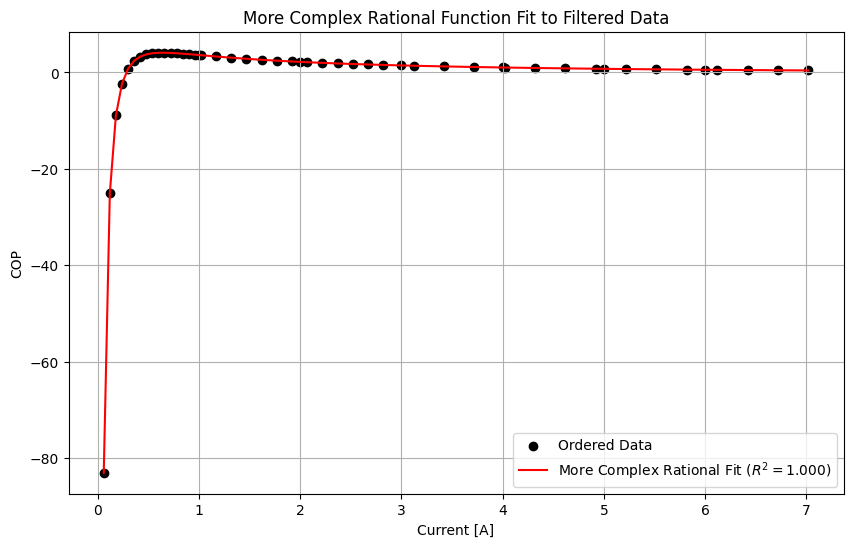

In [7]:
# Define a more complex rational function: y = (a2*x^2 + a1*x + a0) / (b3*x^3 + b2*x^2 + b1*x + b0)
def rational_func_more_terms(x, a3, a2, a1, a0, b3, b2, b1, b0):
    return (a3*x**3 + a2*x**2 + a1*x + a0) / (b3*x**3 + b2*x**2 + b1*x + b0)

# Fit the data to the more complex rational model
params_rational_more_terms, _ = curve_fit(rational_func_more_terms, x_filtered, y_filtered, maxfev=5000)

# Calculate fitted values and R^2 for the more complex rational function
y_fit_rational_more_terms = rational_func_more_terms(x_filtered, *params_rational_more_terms)
r2_rational_more_terms = r2_score(y_filtered, y_fit_rational_more_terms)

# Display the R^2 value for the more complex rational function
print(r2_rational_more_terms)

# Plot the fit alongside the data
plt.figure(figsize=(10, 6))
plt.scatter(x_filtered, y_filtered, label='Ordered Data', color='black')
plt.plot(x_filtered, y_fit_rational_more_terms, label=f'More Complex Rational Fit ($R^2 = {r2_rational_more_terms:.3f}$)', color='red')

plt.xlabel('Current [A]')
plt.ylabel('COP')
plt.title('More Complex Rational Function Fit to Filtered Data')
plt.legend()
plt.grid(True)
plt.show()

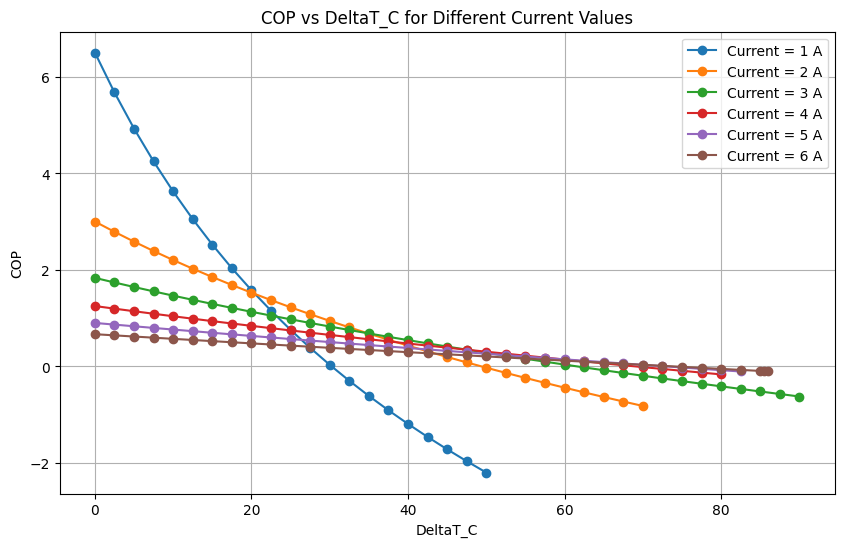

In [14]:
# loop over data and plot in the same figure
# for all Current_A values equal to 1, 2, 3, 4, 5, 6 plot the COP values as function of DeltaT_C
plt.figure(figsize=(10, 6))
for i in range(1, 7):
    current_data = data[data['Current_A'] == i]
    plt.plot(current_data['DeltaT_C'], current_data['COP'], label=f'Current = {i} A', marker='o')

plt.xlabel('DeltaT_C')
plt.ylabel('COP')
plt.title('COP vs DeltaT_C for Different Current Values')
plt.legend()
plt.grid(True)
plt.show()